# This is a notebook developed to analyse Biomage Datasets

This notebook will accept DESeq2 output files and plot volcano plots, and heatmaps.

## Requisite data;

### 1) The output file from the DESeq analysis in csv format
### 2) The input count matrix used to generate the DESeq csv

Place both files in the same directory as this notebook file for easiest use. Edit *filenames* anytime you see a file being read into the pipeline



## Python must be installed through Anaconda due to module dependences, it is possible to install modules piecemeal but it is much easier to just install Anaconda and lauch Jupyter through it

In [1]:
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# determines which count matrices to load -- can be 'filtered' or 'all'
TYPE = ['filtered', 'all']

# determines which layers to use for the output -- can be 'matrix', 'spliced', 'unspliced', 'ambiguous'
LAYER = ['spliced']

# determines which time series to include -- can be a tuple of any of 'm5', 'm3' or 'm1'
TIMESERIES = [('m5', 'm3'), ('m3', 'm1'), ("m5", "m1")]

In [3]:
df = {}

In [4]:
for type in TYPE:
    for layer in LAYER:
        for comparison in TIMESERIES:
            print("now working on type", type, ", layer", layer, ", comparison", comparison)
            path = os.path.join('deseq_results', 'deseq_' + type + '_' + layer + '_' + '-'.join(comparison) + '.csv')
            m = pd.read_csv(path)
            
            m.columns=["gene id", "mean expression", "log2 fold change", "lfcSE", "stat", "pvalue", "pvalue (adjusted)"]
            
            df[(type, layer, comparison)] = m

now working on type filtered , layer spliced , comparison ('m5', 'm3')
now working on type filtered , layer spliced , comparison ('m3', 'm1')
now working on type filtered , layer spliced , comparison ('m5', 'm1')
now working on type all , layer spliced , comparison ('m5', 'm3')
now working on type all , layer spliced , comparison ('m3', 'm1')
now working on type all , layer spliced , comparison ('m5', 'm1')


In [5]:
for key, m in df.items():
    print("inverting adjusted pvalues for", key)
    
    m['p-value (-log)'] = - np.log(m['pvalue (adjusted)'])

inverting adjusted pvalues for ('filtered', 'spliced', ('m5', 'm3'))
inverting adjusted pvalues for ('filtered', 'spliced', ('m3', 'm1'))
inverting adjusted pvalues for ('filtered', 'spliced', ('m5', 'm1'))
inverting adjusted pvalues for ('all', 'spliced', ('m5', 'm3'))
inverting adjusted pvalues for ('all', 'spliced', ('m3', 'm1'))
inverting adjusted pvalues for ('all', 'spliced', ('m5', 'm1'))


In [6]:
for key, m in df.items():
    print("filtering data and highlighting significant findings for", key)

    m['significant'] = (np.abs(m['log2 fold change']) > 2).replace({True : '>2', False : '<=2'})
    m['0.05 threshold'] = m['pvalue (adjusted)'] < 0.05
    m['significant finding'] = (m['0.05 threshold'] == True) & (m['significant'] == '>2') 

filtering data and highlighting significant findings for ('filtered', 'spliced', ('m5', 'm3'))
filtering data and highlighting significant findings for ('filtered', 'spliced', ('m3', 'm1'))
filtering data and highlighting significant findings for ('filtered', 'spliced', ('m5', 'm1'))
filtering data and highlighting significant findings for ('all', 'spliced', ('m5', 'm3'))
filtering data and highlighting significant findings for ('all', 'spliced', ('m3', 'm1'))
filtering data and highlighting significant findings for ('all', 'spliced', ('m5', 'm1'))


# Important plots will be annotated to allow the end-user to understand how to change them;

### To change the size of this figure (pixels) change the parameters within : plt.figure(figsize=(20, 20))
    larger values will lead to a larger figure
    
### To change the horizontal stretch of the figure change the parameter within: aspect = 1.5,

### To change the size of the points of the scatter change the parameter within: s=30

### To remove the significance annotation comment-out (add a "#") before: hue = '0.05 Threshold'

now plotting for ('filtered', 'spliced', ('m5', 'm3'))


<Figure size 1440x1440 with 0 Axes>

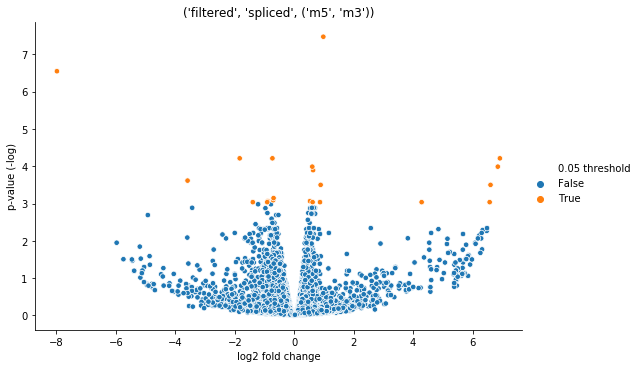

now plotting for ('filtered', 'spliced', ('m3', 'm1'))


<Figure size 1440x1440 with 0 Axes>

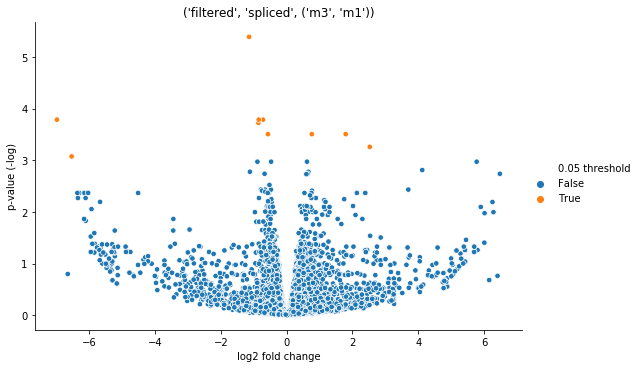

now plotting for ('filtered', 'spliced', ('m5', 'm1'))


<Figure size 1440x1440 with 0 Axes>

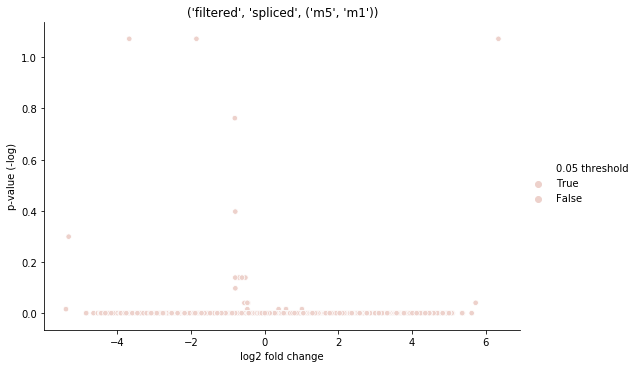

now plotting for ('all', 'spliced', ('m5', 'm3'))


<Figure size 1440x1440 with 0 Axes>

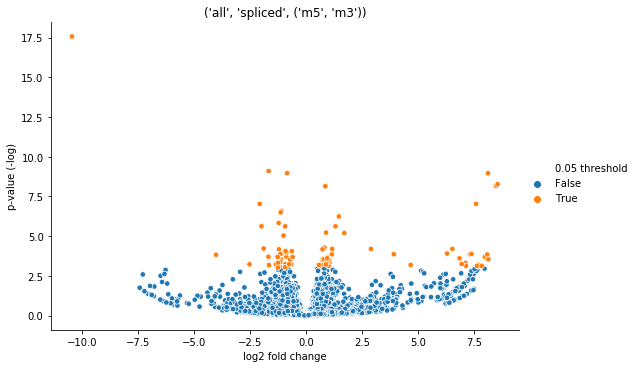

now plotting for ('all', 'spliced', ('m3', 'm1'))


<Figure size 1440x1440 with 0 Axes>

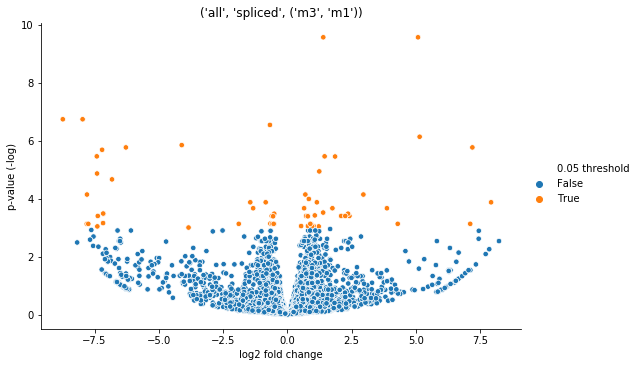

now plotting for ('all', 'spliced', ('m5', 'm1'))


<Figure size 1440x1440 with 0 Axes>

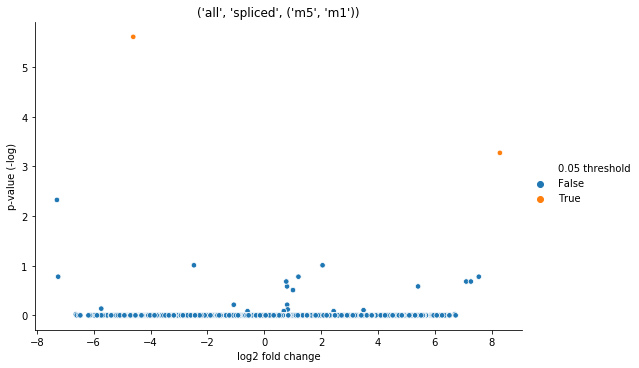

In [7]:
for key, m in df.items():
    print("now plotting for", key)
    plt.figure(figsize=(20, 20))
    ax = sns.relplot(
        data = m[(m['p-value (-log)'] < 40) & (m['log2 fold change'] < 11) & (m['log2 fold change'] > -11)],
        x = 'log2 fold change',
        y = 'p-value (-log)',
        kind="scatter",
        aspect = 1.5,
        hue = '0.05 threshold',
        s=30
    )
    
    plt.title(str(key))
    plt.show()

now plotting basic plot for ('filtered', 'spliced', ('m5', 'm3'))


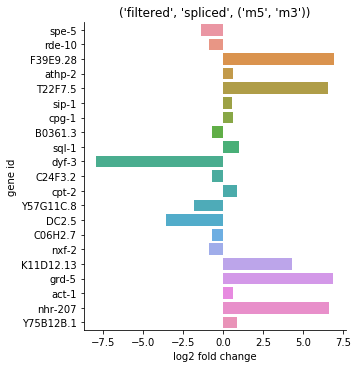

now plotting basic plot for ('filtered', 'spliced', ('m3', 'm1'))


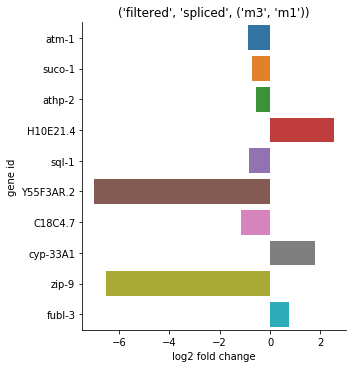

now plotting basic plot for ('filtered', 'spliced', ('m5', 'm1'))
value error for ('filtered', 'spliced', ('m5', 'm1')),          gene id  mean expression  log2 fold change     lfcSE      stat  \
0       Y74C9A.6         0.589034         -2.522873  3.441351 -0.733105   
1         homt-1        44.786024          0.094199  0.262876  0.358339   
2         rcor-1       177.540200         -0.151813  0.150470 -1.008927   
3       Y74C9A.9         0.000000               NaN       NaN       NaN   
4         sesn-1        17.285033          0.186141  0.466597  0.398934   
...          ...              ...               ...       ...       ...   
46899    T23E7.8         0.000000               NaN       NaN       NaN   
46900    T23E7.2         2.974299         -0.431513  1.789895 -0.241083   
46901      cgt-2         0.000000               NaN       NaN       NaN   
46902     6R55.2         0.000000               NaN       NaN       NaN   
46903  cTel55X.1        54.522443          0.005761  0

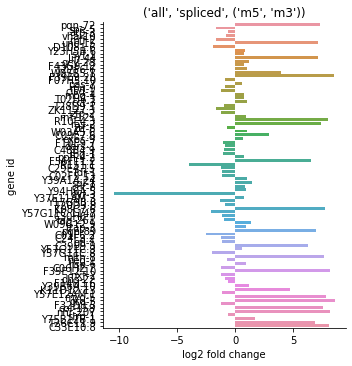

now plotting basic plot for ('all', 'spliced', ('m3', 'm1'))


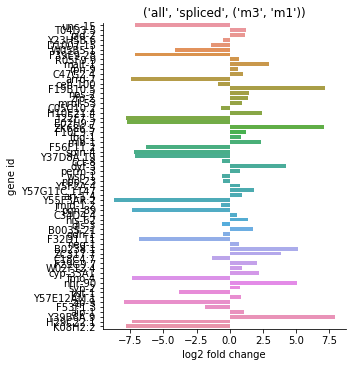

now plotting basic plot for ('all', 'spliced', ('m5', 'm1'))


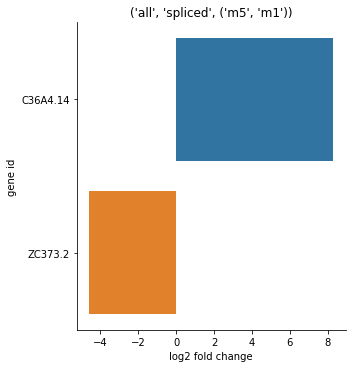

In [8]:
for key, m in df.items():
    try:
        print("now plotting basic plot for", key)

        ax = sns.catplot(
            data= m[m['pvalue (adjusted)'] < 5e-2],
            y="gene id",
            x='log2 fold change',
            kind="bar")
        plt.title(str(key))
        plt.show()
    except ValueError as e:
        print("value error for {}, {}".format(key, m))

## Here we merge our original count matrix with our DESeq2 output file (both csv files) to generate one file with both the individual read counts and the statistical analyses

In [9]:
count_matrix = {}

for type in TYPE:
    for layer in LAYER:
        for comparison in TIMESERIES:
            print("now working on type", type, ", layer", layer, ", comparison", comparison)
            path = os.path.join('tsv_matrices', 'matrix_' + type + '_' + layer + '_' + '-'.join(comparison) + '.tsv')
            m = pd.read_csv(path, sep="\t")
            
            count_matrix[(type, layer, comparison)] = m

now working on type filtered , layer spliced , comparison ('m5', 'm3')
now working on type filtered , layer spliced , comparison ('m3', 'm1')
now working on type filtered , layer spliced , comparison ('m5', 'm1')
now working on type all , layer spliced , comparison ('m5', 'm3')
now working on type all , layer spliced , comparison ('m3', 'm1')
now working on type all , layer spliced , comparison ('m5', 'm1')


In [10]:
merged = {}

for key in count_matrix.keys():
    merged[key] = pd.merge(df[key], count_matrix[key], left_on="gene id",right_on="Unnamed: 0")

In [11]:
merged[('filtered', 'spliced', ('m5', 'm1'))].query("`gene id` == 'Y51F10.2'")

,gene id,mean expression,log2 fold change,lfcSE,stat,pvalue,pvalue (adjusted),p-value (-log),significant,0.05 threshold,significant finding,Unnamed: 0,m5_1,m5_2,m5_3,m5_4,m1_1,m1_2,m1_3,m1_4
2262,Y51F10.2,348.066283,0.237614,0.128425,1.850211,0.064283,0.99881,0.001191,<=2,False,False,Y51F10.2,292,376,341,339,339,363,319,431


In [12]:
NASCENT_TRANSCRIPTS = {"m1": {'vha-13', 'ssl-1', 'T21B10.3', 'Y43F8C.6', 'unc-62', 'pqn-80', 'atgl-1', 'hum-2', 'alg-5', 'B0432.8', 'K06B9.2', 'bet-1', 'ZC506.1', 'F40E10.6', 'Y51F10.2', 'unc-73', 'K10D3.4'},
                       "m3": {'vha-13', 'T21B10.3', 'Y43F8C.6', 'gnrr-2', 'pqn-80', 'atgl-1', 'B0432.8', 'C44E4.5', 'K06B9.2', 'bet-1', 'ZC506.1', 'F40E10.6', 'Y51F10.2', 'unc-73', 'K10D3.4'},
                       "m5" : {'vha-13', 'T21B10.3', 'atgl-1', 'B0432.8', 'C44E4.5', 'K06B9.2', 'bet-1', 'ZC506.1', 'F40E10.6', 'unc-73'}}

In [13]:
NASCENT_TRANSCRIPTS

{'m1': {'B0432.8',
  'F40E10.6',
  'K06B9.2',
  'K10D3.4',
  'T21B10.3',
  'Y43F8C.6',
  'Y51F10.2',
  'ZC506.1',
  'alg-5',
  'atgl-1',
  'bet-1',
  'hum-2',
  'pqn-80',
  'ssl-1',
  'unc-62',
  'unc-73',
  'vha-13'},
 'm3': {'B0432.8',
  'C44E4.5',
  'F40E10.6',
  'K06B9.2',
  'K10D3.4',
  'T21B10.3',
  'Y43F8C.6',
  'Y51F10.2',
  'ZC506.1',
  'atgl-1',
  'bet-1',
  'gnrr-2',
  'pqn-80',
  'unc-73',
  'vha-13'},
 'm5': {'B0432.8',
  'C44E4.5',
  'F40E10.6',
  'K06B9.2',
  'T21B10.3',
  'ZC506.1',
  'atgl-1',
  'bet-1',
  'unc-73',
  'vha-13'}}

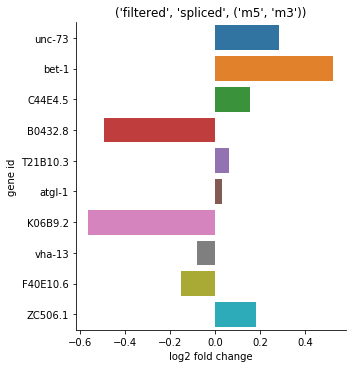

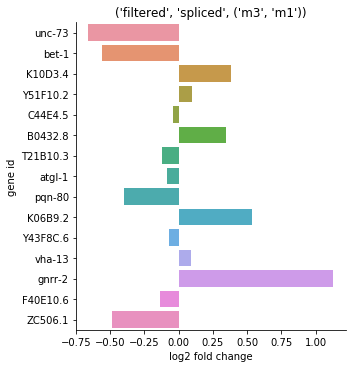

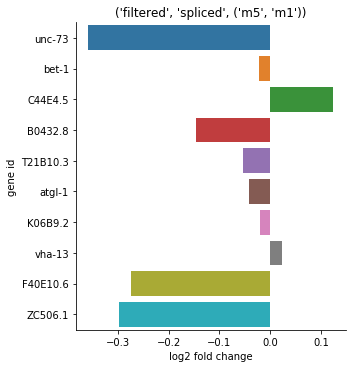

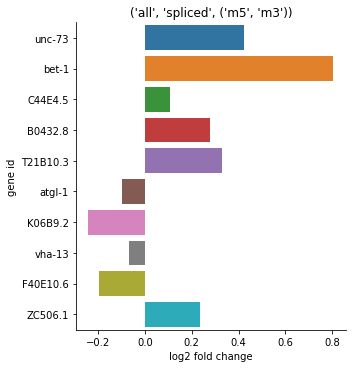

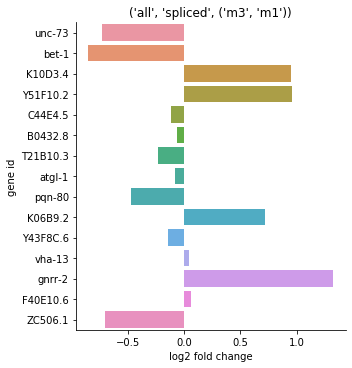

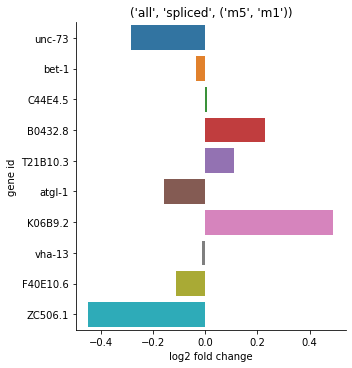

In [14]:
nascent = {}

for key, m in merged.items():
    
    _, _, (original, _) = key
    
    nascent[key] = m[m["gene id"].isin(NASCENT_TRANSCRIPTS[original])]
    
    ax = sns.catplot(
        data=nascent[key],
        y="gene id",
        x='log2 fold change',
        kind="bar")

    plt.title(str(key))
    plt.show()

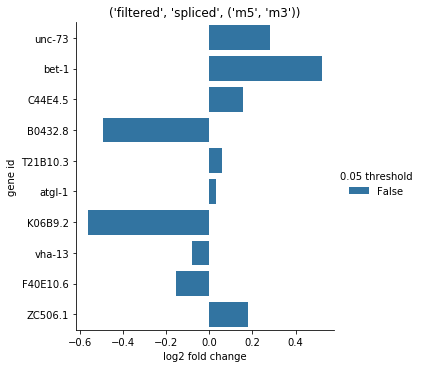

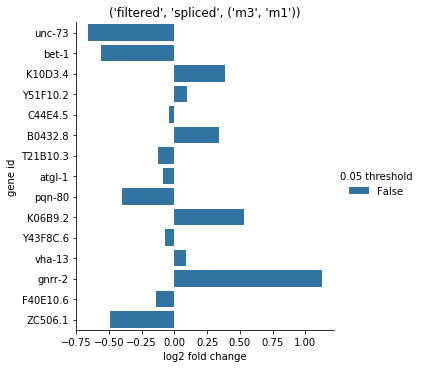

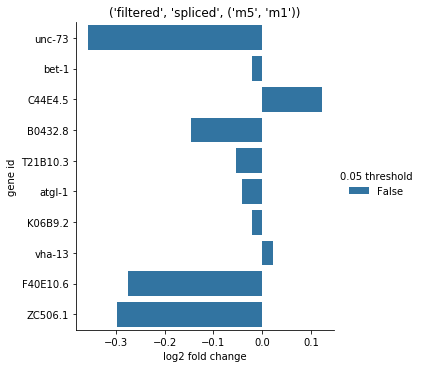

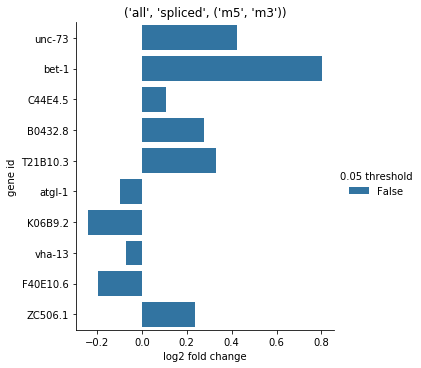

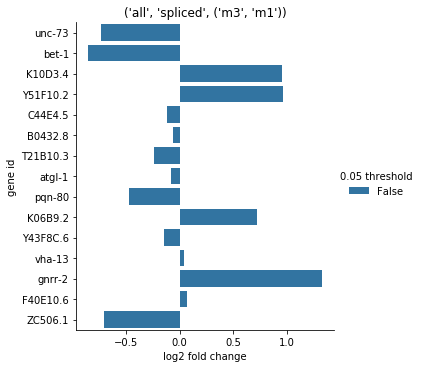

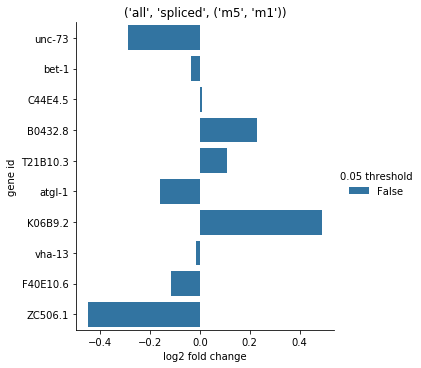

In [23]:
nascent = {}

for key, m in merged.items():
    
    _, _, (original, _) = key
    
    nascent[key] = m[m["gene id"].isin(NASCENT_TRANSCRIPTS[original])]
    
    ax = sns.catplot(
        data=nascent[key],
        y="gene id",
        x='log2 fold change',
        kind="bar",
        hue="0.05 threshold")

    plt.title(str(key))
    plt.show()

AttributeError: 'str' object has no attribute 'get'

In [16]:
def melt_df(df):
    melted = {}

    for key, m in df.items():
        TO_REMOVE = ["significant", "0.05 threshold", "significant finding", "Unnamed: 0", "p-value (-log)"]
        ID_VARS = ["gene id", "mean expression", "log2 fold change", "lfcSE", "stat", "pvalue", "pvalue (adjusted)"]

        m = m.drop(columns=TO_REMOVE)
        m = m.melt(id_vars = ID_VARS, var_name = "sample", value_name = "expression")

        m['timeseries'] = m['sample'].apply(lambda x : x.split('_')[0])
        m['expression (log)'] = np.log(m['expression'])

        melted[key] = m
    
    return melted

/home/ubuntu/.local/lib/python3.6/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/ubuntu/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1291: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/home/ubuntu/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/ubuntu/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/ubuntu/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1291: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/home/ubuntu/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <

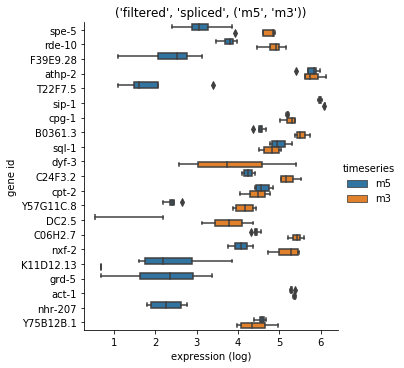

/home/ubuntu/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1291: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/home/ubuntu/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/ubuntu/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/ubuntu/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1291: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
/home/ubuntu/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/ubuntu/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]


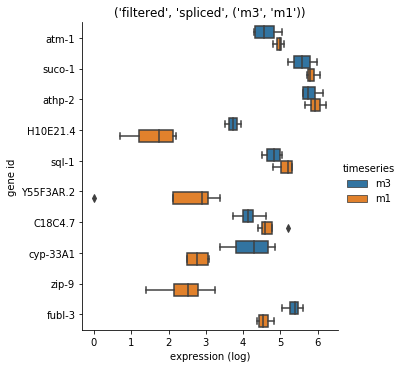

ValueError: min() arg is an empty sequence

In [17]:
for key, m in melt_df(merged).items():
    ax = sns.catplot(
        data = m[m['pvalue (adjusted)'] < 5e-2],
        y = "gene id",
        x = 'expression (log)',
        hue = 'timeseries',
        kind = 'box'
    )
    
    plt.title(str(key))
    plt.show()   

In [ ]:
for key, m in melt_df(nascent).items():
    ax = sns.catplot(
        data = m,
        y = "gene id",
        x = 'expression (log)',
        hue = 'timeseries',
        kind = 'violin'
    )
    
    plt.title(str(key))
    plt.show()

In [ ]:
for key, m in melt_df(merged).items():
    try:
        print("plotting for", key)
        plt.figure(figsize=(20,20))

        ax = sns.clustermap(
            m[m['pvalue (adjusted)'] < 5e-2].groupby(["gene id", 'sample'])['expression'].mean().unstack(),
            z_score=0,
            row_cluster=True
        )

        plt.title(str(key))
        plt.show()
    except:
        print("could not plot heatmap for", key)